## Test migration history reconstruction on Sanborn et. al. Melanoma data

In [1]:
import sys
import os

repo_dir = os.path.join(os.getcwd(), "../")
os.chdir(repo_dir)

from src.lib.metient import *

import matplotlib
import torch

matplotlib.rcParams['figure.figsize'] = [3, 3]
SANBORN_DATA_DIR = os.path.join(repo_dir, 'data/sanborn_melanoma_2015')
COLORS = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]


CUDA GPU: False


In [2]:
def run_evaluate(all_mut_trees_fn, ref_var_fn, patient_name, sites_map):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = get_ref_var_matrices(ref_var_fn)
    data = get_adj_matrices_from_spruce_mutation_trees(all_mut_trees_fn, cluster_label_to_idx)
    print("num trees:", len(data))
    unique_sites = [sites_map[s] for s in unique_sites]
    print(unique_sites)
    for adj_matrix, idx_to_label in data:
        G = get_genetic_distance_matrix_from_adj_matrix(adj_matrix, idx_to_label, "_")
        print(G)
        for idx in idx_to_label:
            idx_to_label[idx] = idx_to_label[idx].split("_")[0].split(":")[0]
        print(idx_to_label)

        weights = Weights(mig=[10.0], seed_site=[1.0], mig_delta=0.8, gen_dist=0.0)
        print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=20)
        evaluate(adj_matrix, ref_matrix, var_matrix, unique_sites, sites_map['primary'], idx_to_label,
                 weights, print_config, SANBORN_DATA_DIR, patient_name, G=None, max_iter=50, batch_size=1000,
                 custom_colors=COLORS, weight_init_primary=True, solve_polytomies=True)


        

In [3]:
# For visualization on migration graph
A_sites_map = {
    "primary" : "Primary, forehead",
    "locoregional_1" : "Locoregional 1",
    "locoregional_2" : "Locoregional 2",
    "parotid_gland" : "Parotid"
}
C_sites_map = {
    "primary" : "Primary, leg",
    "locoregional_1" : "Locoregional, leg 1",
    "locoregional_2" : "Locoregional, leg 2",
}
D_sites_map = {
    "primary" : "Primary, leg",
    "locoregional_1" : "Locoregional, leg 1",
    "locoregional_2" : "Locoregional, leg 2",
    'lymph_node' : "Lymph node, groin"
}
E_sites_map = {
    "primary" : "Primary, heel",
    "locoregional_1" : "Locoregional, heel 1",
    "locoregional_2" : "Locoregional, heel 2",
    "locoregional_3" : "Locoregional, heel 3",
    'lymph_node' : "Lymph node, groin"
}
F_sites_map = {
    "primary" : "Primary, ear",
    "locoregional" : "Locoregional, ear",
    'distant' : "Distant, back",
    'lymph_node' : "Lymph node, cervical"
}
G_sites_map = {
    "primary" : "Primary",
    "locoregional" : "Locoregional",
    'lung' : "Lung",
}

num trees: 1
['Primary, forehead', 'Parotid', 'Locoregional 1', 'Locoregional 2']
tensor([[0.0000, 0.0246, 0.0082, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9672],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])
{0: 'ENAM', 1: 'C11orf93', 2: 'KLHL6', 3: 'LPHN3'}


/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


T torch.Size([10, 10])
num_nodes_to_label 3


  0%|          | 0/50 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 50/50 [00:01<00:00, 25.76it/s]


Time elapsed: 2.278944
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae40d23df40>]


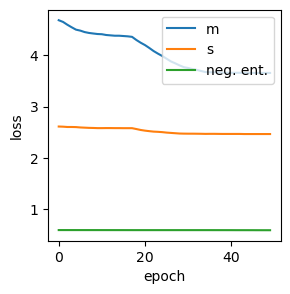

20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

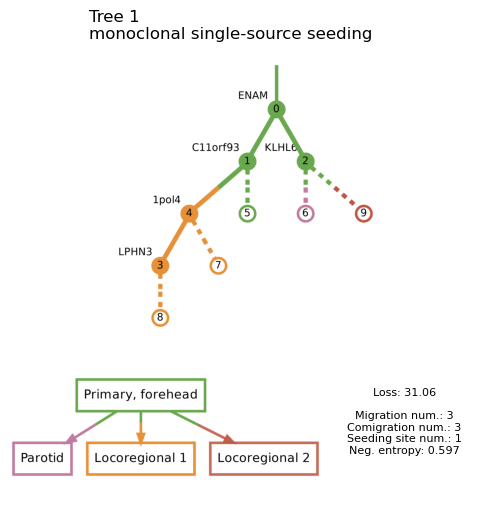

Saving A_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [4]:
# Patient A
patient = "A"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", A_sites_map)


num trees: 1
['Primary, leg', 'Locoregional, leg 1', 'Locoregional, leg 2']
tensor([[0.0000, 0.0019, 0.0181, 0.0095, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.9704],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
{0: 'CADM3', 1: 'GPR128', 2: 'MTHFR', 3: 'RERE', 4: 'AGRN'}


/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


T torch.Size([11, 11])
num_nodes_to_label 4


  0%|          | 0/50 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 50/50 [00:01<00:00, 25.71it/s]


Time elapsed: 2.212251
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48d346fd0>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48d346e50>]


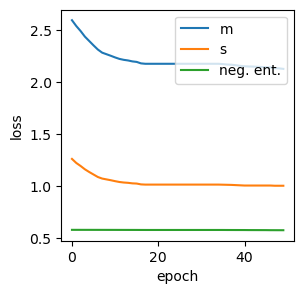

20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

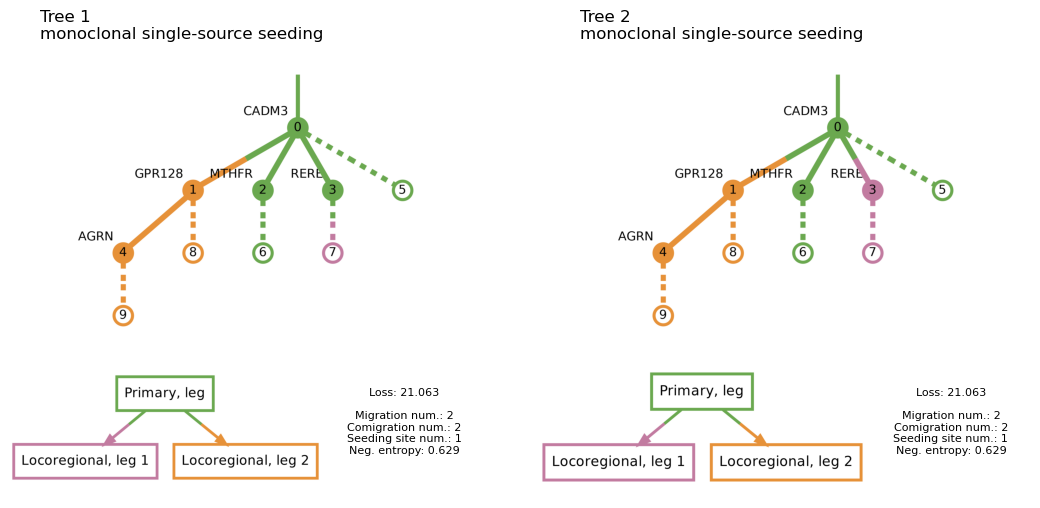

Saving C_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [5]:
# Patient C
patient = "C"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", C_sites_map)


num trees: 1
['Primary, leg', 'Lymph node, groin', 'Locoregional, leg 1', 'Locoregional, leg 2']
tensor([[0., 1.],
        [0., 0.]])
{0: 'ZNF407', 1: 'ASXL3'}
T torch.Size([10, 10])
num_nodes_to_label 1


100%|██████████| 50/50 [00:01<00:00, 28.64it/s]


Time elapsed: 2.075758
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48eb958e0>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ed6ea60>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ed68f70>]


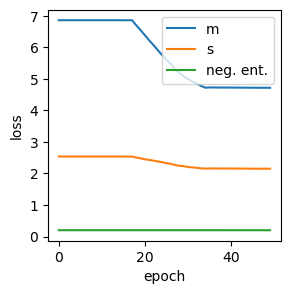

20 unique trees were not found (3 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

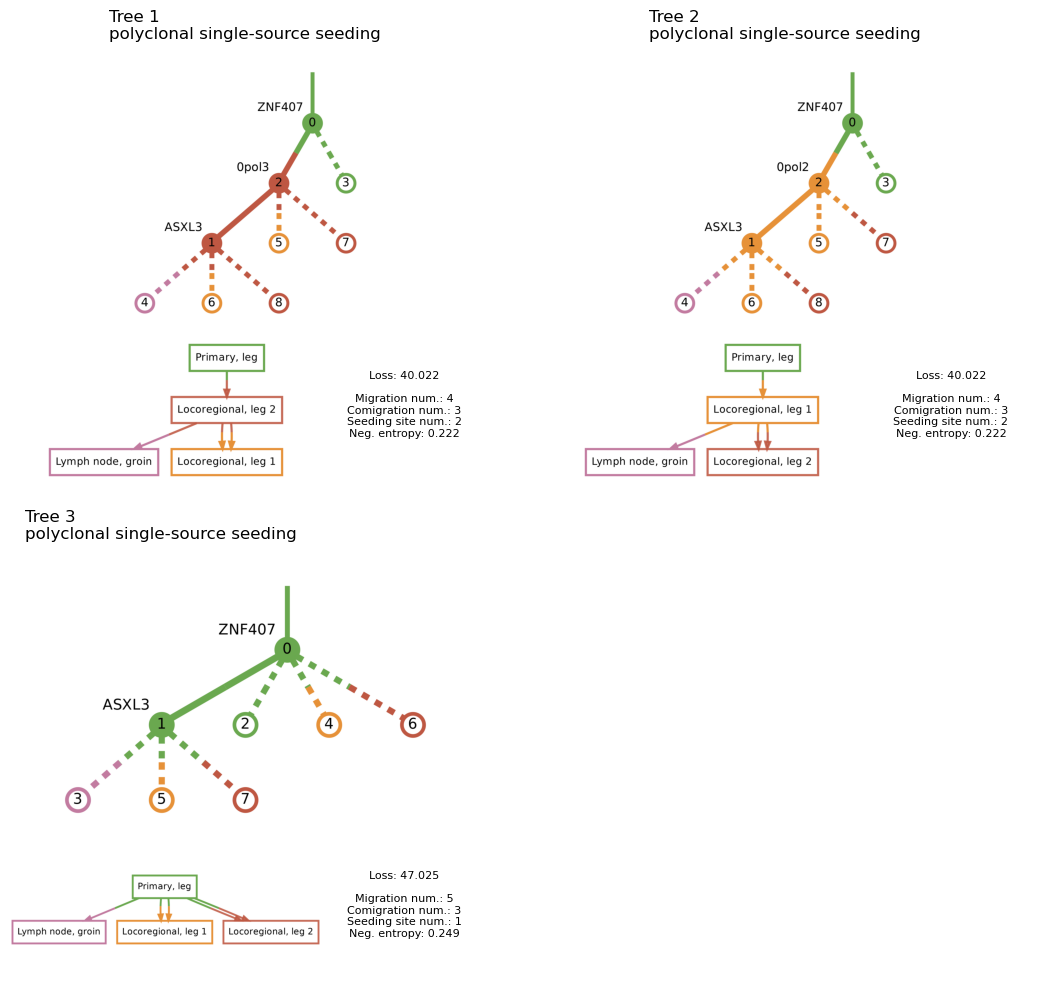

Saving D_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [6]:
# Patient D
patient = "D"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", D_sites_map)


num trees: 1
['Primary, heel', 'Locoregional, heel 1', 'Locoregional, heel 2', 'Lymph node, groin', 'Locoregional, heel 3']
tensor([[0.0000, 0.0000, 0.0000, 0.1207, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0517, 0.0000, 0.0172, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0517, 0.0345, 0.7069, 0.0172],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
{0: 'ASPM', 1: 'ZNF829', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}
original T [[0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0

100%|██████████| 50/50 [00:02<00:00, 20.10it/s]


Time elapsed: 2.817572
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48cd89c10>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee66970>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee66e50>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee53640>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48eb4ae50>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48eb4ac10>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee3fbb0>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee3f280>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48cd89d90>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ec17490>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee51970>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48ee66340>, <src.lib.vertex_labeling.VertexLabelingSolution object at

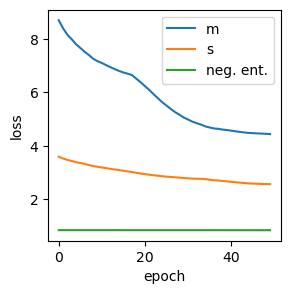

20 unique trees were not found (14 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

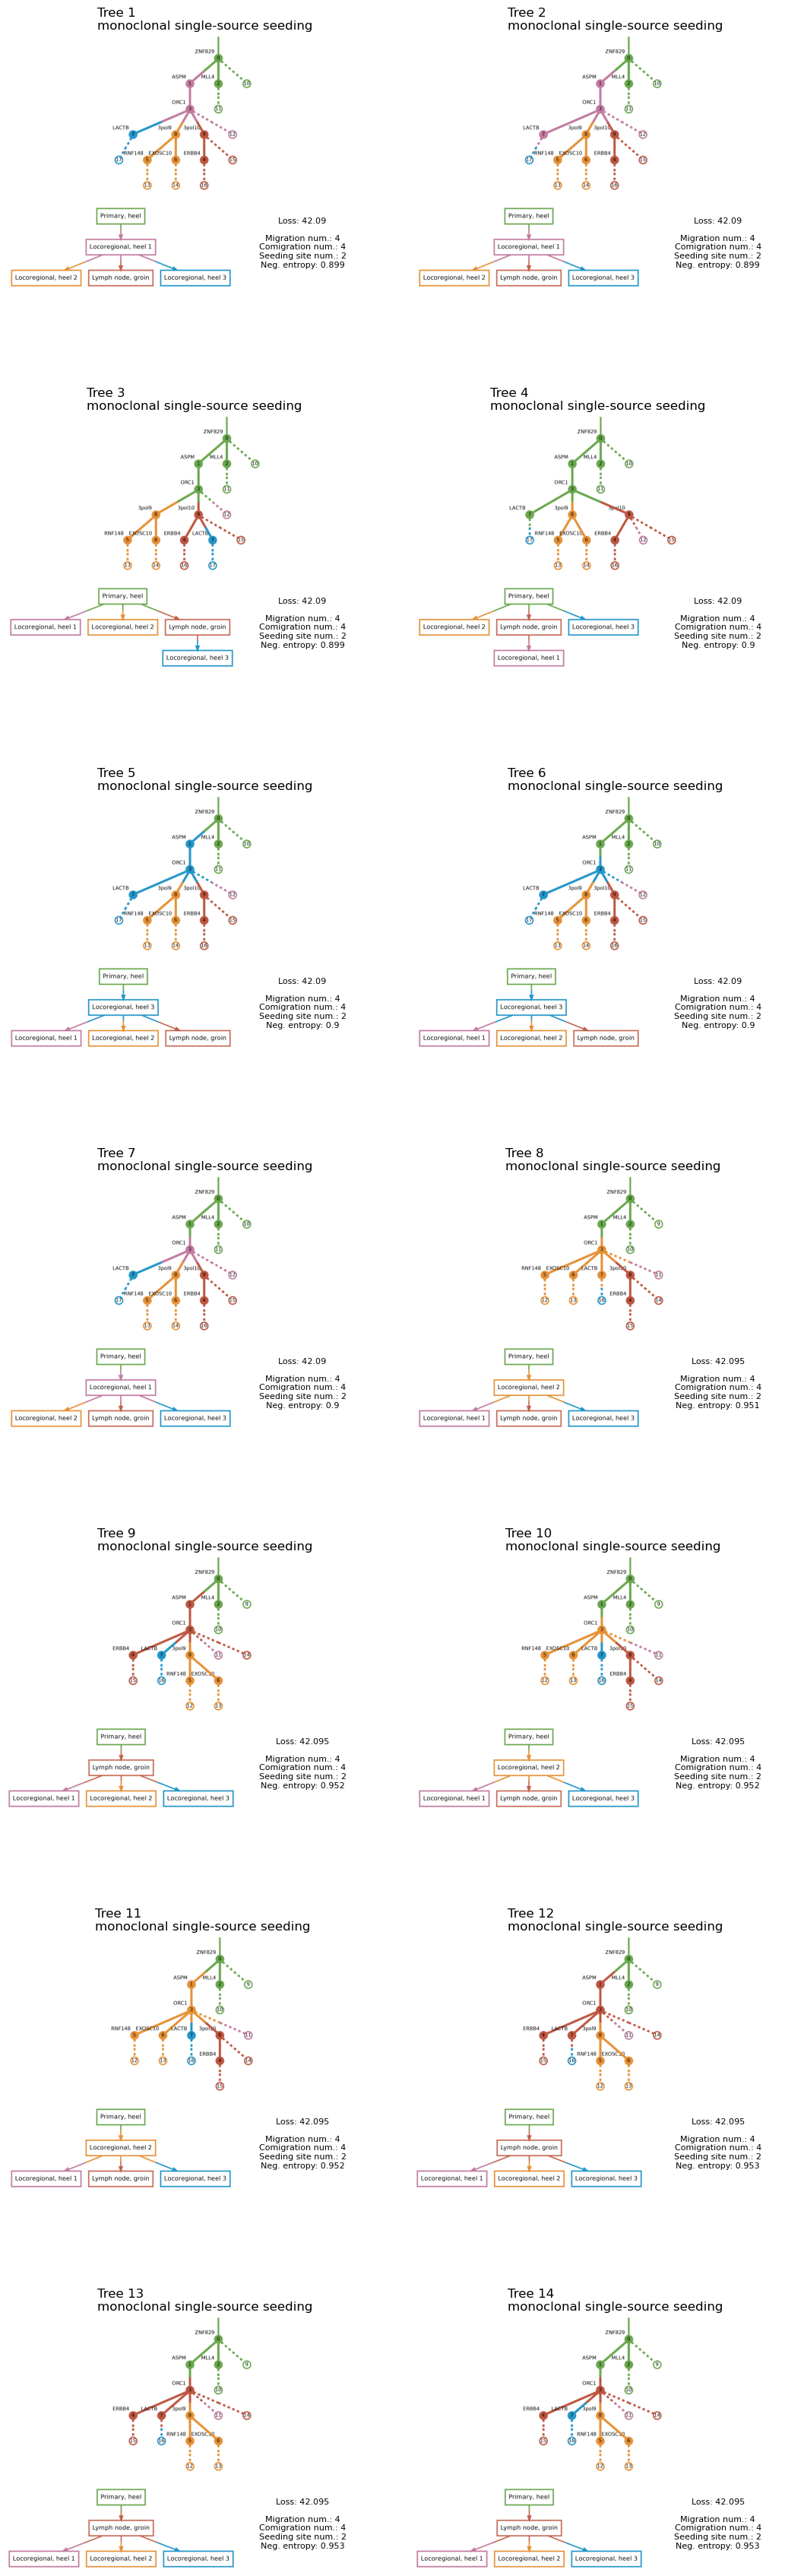

Saving E_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [7]:
# Patient E
patient = "E"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", E_sites_map)


num trees: 1
['Primary, ear', 'Lymph node, cervical', 'Locoregional, ear', 'Distant, back']
tensor([[0.0000e+00, 1.4058e-03, 9.3721e-04, 0.0000e+00, 9.9672e-01],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 9.3721e-04, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])
{0: 'CNGA3', 1: 'LY75-CD302', 2: 'DOCK10', 3: 'TXNDC16', 4: 'LCK'}
T torch.Size([28, 28])
num_nodes_to_label 4


100%|██████████| 50/50 [00:03<00:00, 15.23it/s]


Time elapsed: 3.609059
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48d3a4550>]


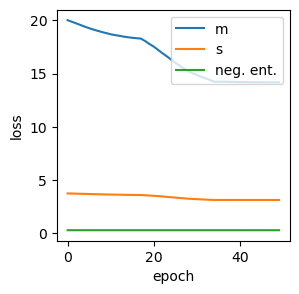

20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

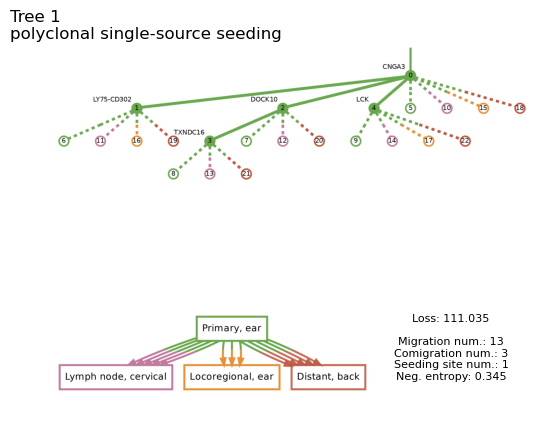

Saving F_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [8]:
# Patient F
patient = "F"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", F_sites_map)


num trees: 1
['Primary', 'Lung', 'Locoregional']
tensor([[0.0000, 0.0213, 0.9787],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])
{0: 'ABLIM2', 1: 'SHISA3', 2: 'DGKQ'}
T torch.Size([8, 8])
num_nodes_to_label 2


100%|██████████| 50/50 [00:01<00:00, 33.61it/s]


Time elapsed: 1.735898
# final solutions: [<src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae48cee36d0>, <src.lib.vertex_labeling.VertexLabelingSolution object at 0x2ae40bd087c0>]


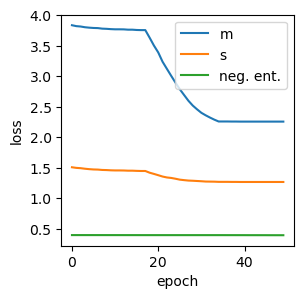

20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

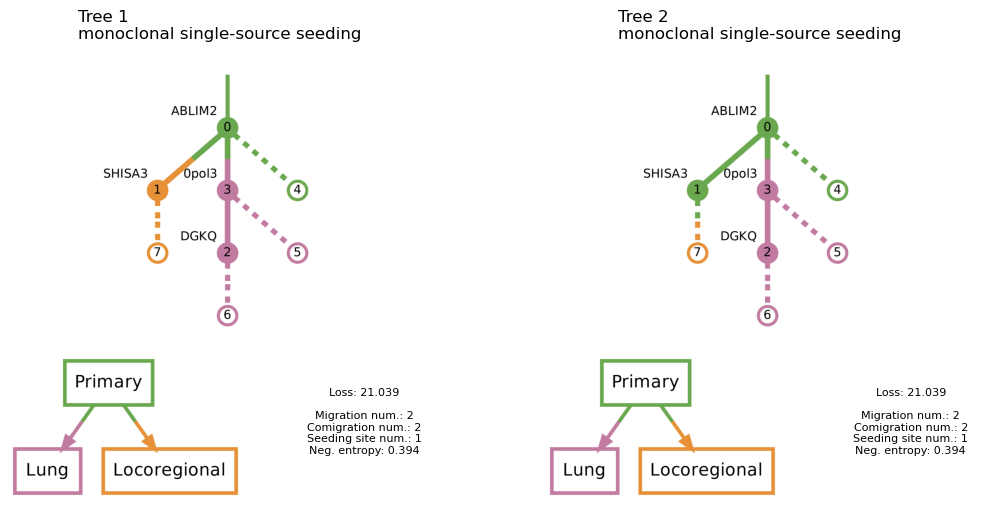

Saving G_eval to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015


In [9]:
# Patient G
patient = "G"
run_evaluate(os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt"), os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv"), f"{patient}_eval", G_sites_map)


### Run all patients in calibrate mode

Overwriting existing directory at /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate


/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


T torch.Size([12, 12])
num_nodes_to_label 3


  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 100/100 [00:01<00:00, 60.17it/s]


Time elapsed: 1.976795
# final solutions: 1
Saving A_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([11, 11])
num_nodes_to_label 4


100%|██████████| 100/100 [00:01<00:00, 59.43it/s]


Time elapsed: 1.934034
# final solutions: 2
Saving C_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([10, 10])
num_nodes_to_label 1


100%|██████████| 100/100 [00:01<00:00, 67.25it/s]


Time elapsed: 1.737658
# final solutions: 3
Saving D_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
original T [[0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] {0: 'ASPM', 1: 'ZNF829', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}
restructured T [[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] {0: 'ZNF829', 1: 'ASPM', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}
T torch.Size([19, 19])
num_nodes_to_label 7


100%|██████████| 100/100 [00:02<00:00, 44.97it/s]


Time elapsed: 2.472742
# final solutions: 11
Saving E_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([28, 28])
num_nodes_to_label 4


100%|██████████| 100/100 [00:02<00:00, 34.03it/s]


Time elapsed: 3.186869
# final solutions: 1
Saving F_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([8, 8])
num_nodes_to_label 2


100%|██████████| 100/100 [00:01<00:00, 77.55it/s]


Time elapsed: 1.534495
# final solutions: 2
Saving G_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
unique weights {(0.8999999761581421, 0.10000000149011612, 0.8), (0.25, 0.75, 0.8), (0.75, 0.25, 0.8), (0.5, 0.5, 0.8), (0.10000000149011612, 0.8999999761581421, 0.8)}
total patients 30
BEST THETA (0.5, 0.5, 0.8)


/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


T torch.Size([14, 14])
num_nodes_to_label 3


  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 100/100 [00:01<00:00, 54.33it/s]


Time elapsed: 2.07824
# final solutions: 1


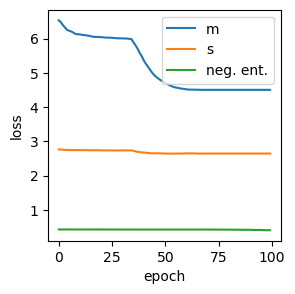

20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

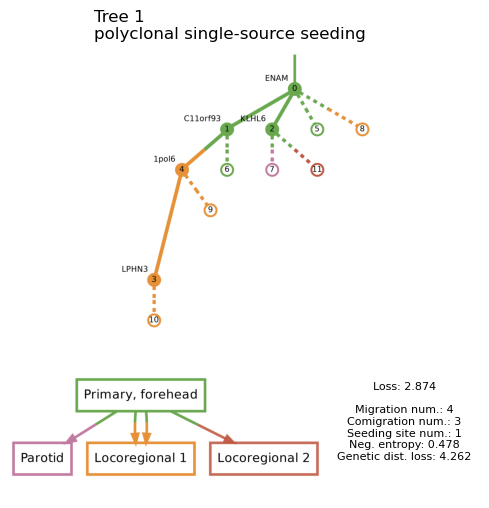

Saving A_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate


/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:259: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)


T torch.Size([11, 11])
num_nodes_to_label 4


  0%|          | 0/100 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/met_history_prediction/src/util/vertex_labeling_util.py:250: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 100/100 [00:01<00:00, 59.68it/s]


Time elapsed: 1.92395
# final solutions: 2


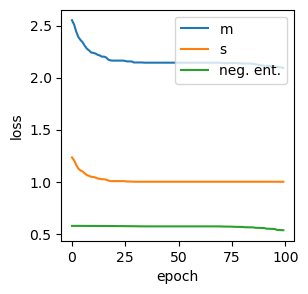

20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

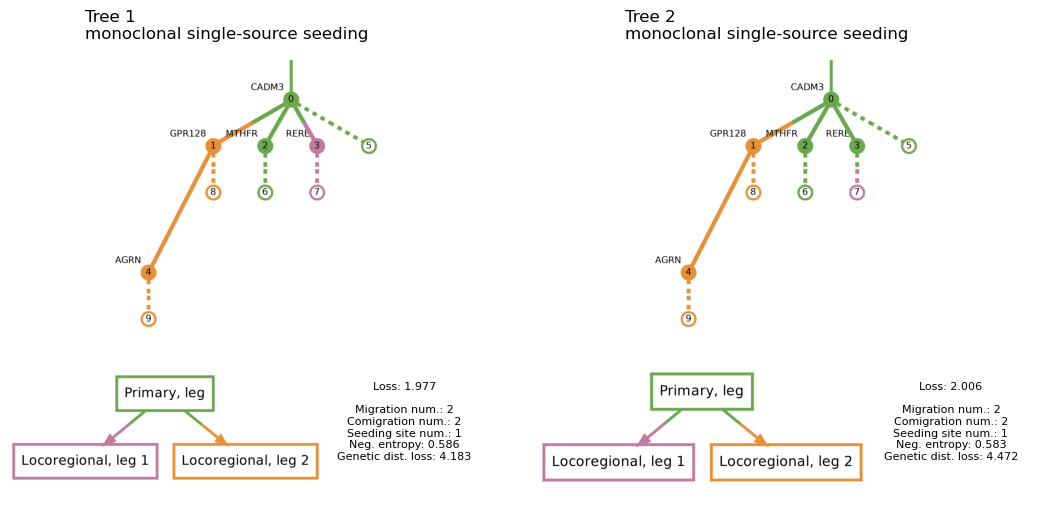

Saving C_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([10, 10])
num_nodes_to_label 1


100%|██████████| 100/100 [00:01<00:00, 62.64it/s]


Time elapsed: 1.842658
# final solutions: 2


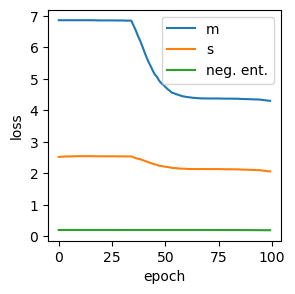

20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

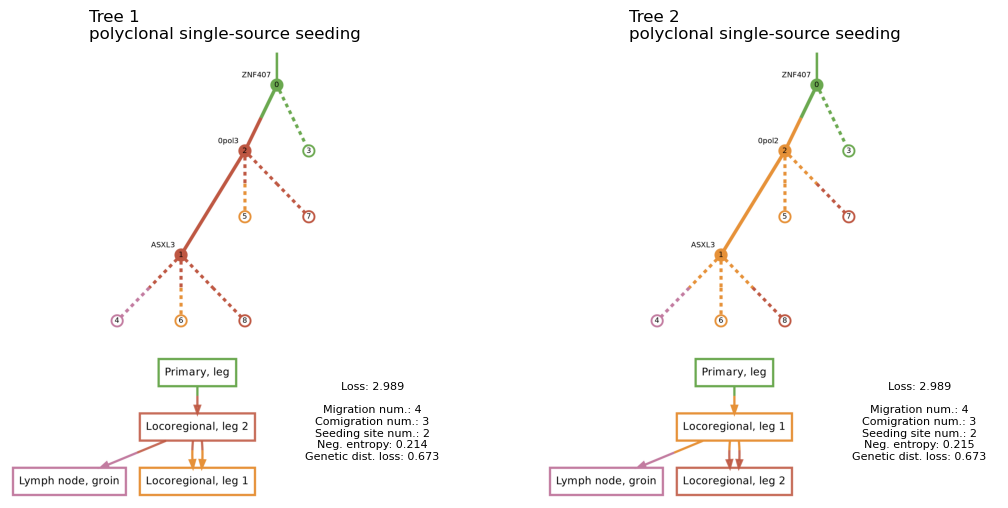

Saving D_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
original T [[0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] {0: 'ASPM', 1: 'ZNF829', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}
restructured T [[0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]] {0: 'ZNF829', 1: 'ASPM', 2: 'MLL4', 3: 'ORC1', 4: 'ERBB4', 5: 'RNF148', 6: 'EXOSC10', 7: 'LACTB'}
T torch.Size([19, 19])
num_nodes_to_label 7


100%|██████████| 100/100 [00:02<00:00, 40.52it/s]


Time elapsed: 2.71935
# final solutions: 11


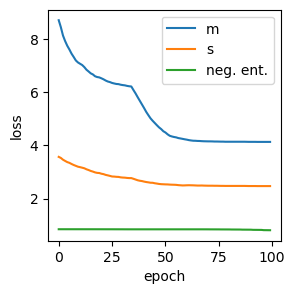

20 unique trees were not found (11 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

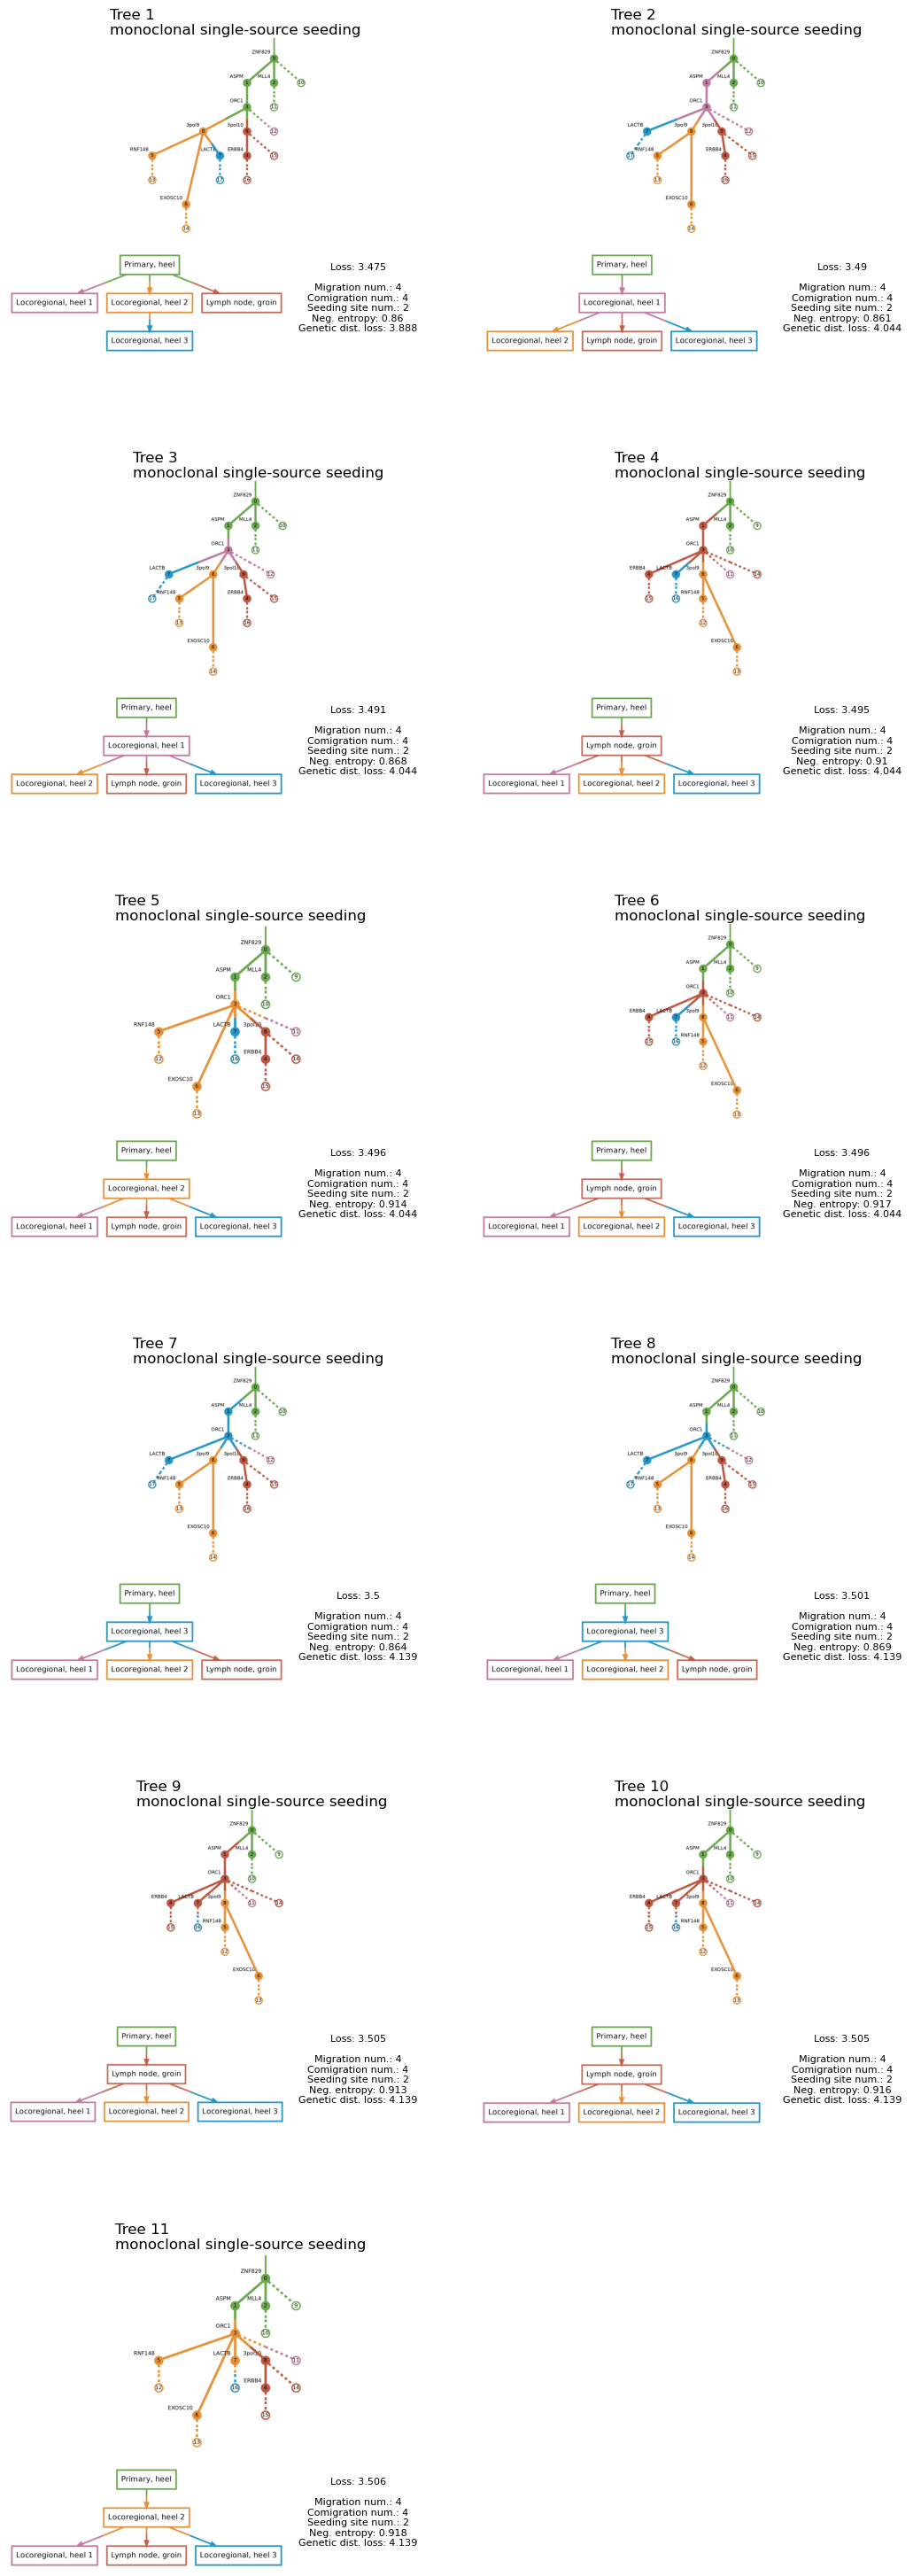

Saving E_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([28, 28])
num_nodes_to_label 4


100%|██████████| 100/100 [00:03<00:00, 32.51it/s]


Time elapsed: 3.33944
# final solutions: 1


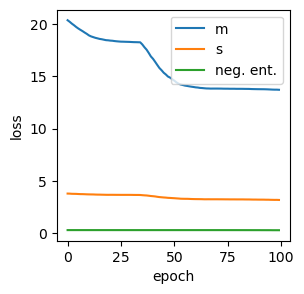

20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

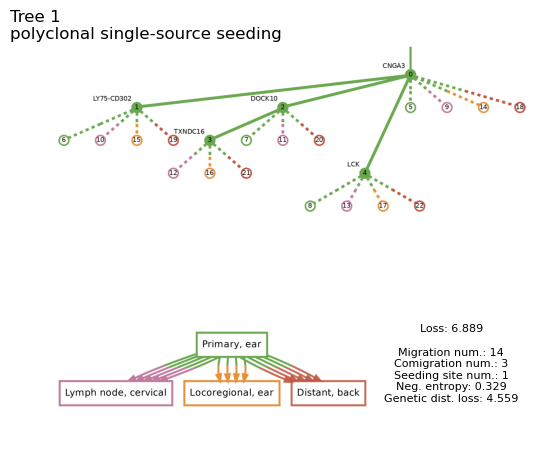

Saving F_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate
T torch.Size([8, 8])
num_nodes_to_label 2


100%|██████████| 100/100 [00:01<00:00, 66.14it/s]


Time elapsed: 1.756058
# final solutions: 2


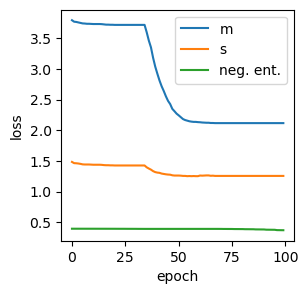

20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 300x300 with 0 Axes>

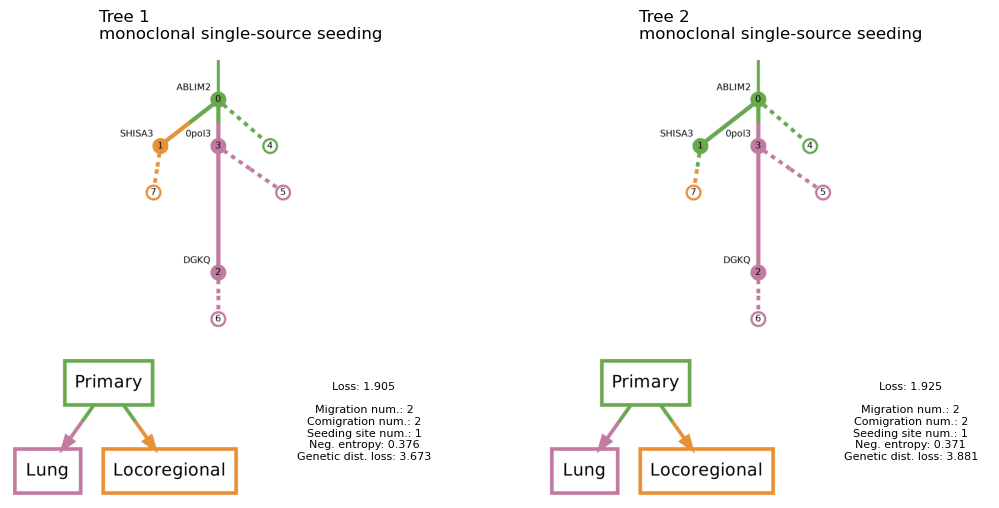

Saving G_calibrate_tree0 to /lila/data/morrisq/divyak/projects/met_history_prediction/src/jupyter_notebooks/../data/sanborn_melanoma_2015/calibrate


In [4]:
# Collect data
Ts, ref_matrices, var_matrices, ordered_sites, primary_sites, node_idx_to_labels,run_names,Gs = [],[],[],[],[],[],[],[]

for patient, sites_map in zip(["A", "C", "D", "E", "F", "G"], [A_sites_map,C_sites_map,D_sites_map,E_sites_map,F_sites_map,G_sites_map]):
    mut_trees_fn = os.path.join(SANBORN_DATA_DIR, f"{patient}_mut_trees.txt")
    ref_var_fn = os.path.join(SANBORN_DATA_DIR, f"{patient}_0.95.tsv")
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = get_ref_var_matrices(ref_var_fn)
    data = get_adj_matrices_from_spruce_mutation_trees(mut_trees_fn, cluster_label_to_idx)
    unique_sites = [sites_map[s] for s in unique_sites]
    for tree_num, (adj_matrix, idx_to_label) in enumerate(data):
        G = get_genetic_distance_matrix_from_adj_matrix(adj_matrix, idx_to_label, "_")
        for idx in idx_to_label:
            idx_to_label[idx] = idx_to_label[idx].split("_")[0].split(":")[0]
        
        Ts.append(adj_matrix)
        ref_matrices.append(ref_matrix)
        var_matrices.append(var_matrix)
        ordered_sites.append(unique_sites)
        primary_sites.append(sites_map["primary"])
        node_idx_to_labels.append(idx_to_label)
        Gs.append(G)
        run_names.append(f"{patient}_calibrate_tree{tree_num}")
                              
weights = Weights(gen_dist=0.1)
print_config = PrintConfig(visualize=True, verbose=True, viz_intermeds=False, k_best_trees=20)
calibrate(Ts,ref_matrices, var_matrices, ordered_sites, primary_sites,node_idx_to_labels,
          weights,print_config, SANBORN_DATA_DIR, run_names, Gs=Gs,batch_size=500,custom_colors=COLORS,
          solve_polytomies=True,)
